<a href="https://colab.research.google.com/github/ZackAkil/visual-art-gallery-search-with-ml/blob/main/Image_embeddings_for_custom_search_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [135]:
ds = tfds.load('imagenette', split='train[:500]')

In [136]:
def preprocess_data(dataset, shape, show_first=5):
  images = []
  for i, img in enumerate(dataset.as_numpy_iterator()):
    img_data = img['image']
    
    img_data_scaled = img_data / 255.
    image = tf.image.resize(img_data_scaled, shape)
    images.append(image)
    if i < show_first:
      print(img_data.shape)
      plt.imshow(image)
      plt.show()
  return images

(101, 125, 3)


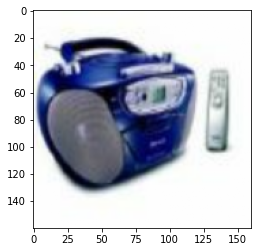

(375, 500, 3)


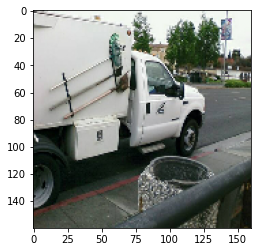

(335, 500, 3)


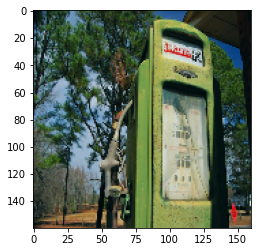

(429, 500, 3)


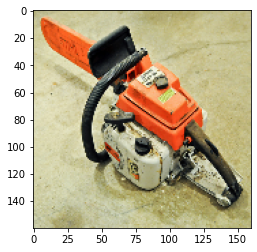

(359, 500, 3)


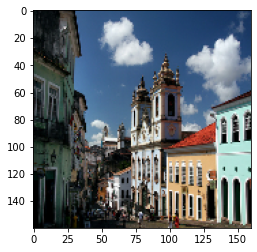

In [137]:
images = preprocess_data(ds, (160, 160))

# Standard Classification Model

In [5]:
!wget https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt 

--2022-01-27 12:07:28--  https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10484 (10K) [text/plain]
Saving to: ‘ImageNetLabels.txt.1’

ImageNetLabels.txt. 100%[===================>]  10.24K  --.-KB/s    in 0s      

2022-01-27 12:07:28 (56.6 MB/s) - ‘ImageNetLabels.txt.1’ saved [10484/10484]



In [138]:
with open("ImageNetLabels.txt") as f:
    label_names = f.read().splitlines() 

In [139]:
import tensorflow_hub as hub

In [140]:
classification_model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v1_100_160/classification/5")
])
classification_model.build([None, 160, 160, 3])  # Batch input shape.

In [141]:
classification_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1001)              4254889   
                                                                 
Total params: 4,254,889
Trainable params: 0
Non-trainable params: 4,254,889
_________________________________________________________________


-------


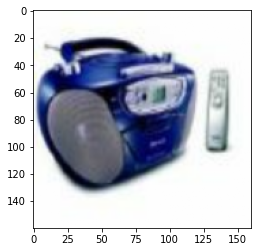

cassette player
-------


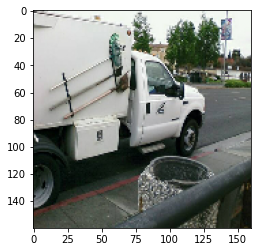

tow truck
-------


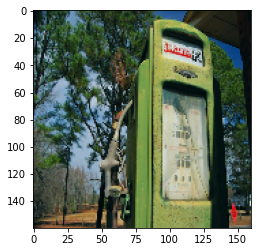

gas pump
-------


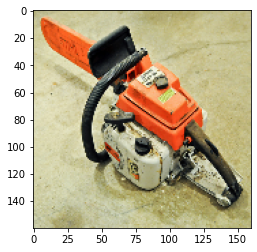

chain saw
-------


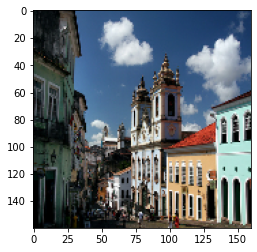

monastery


In [142]:
for i in range(5):
  IMAGE_INDEX = i

  print('-------')

  plt.imshow(images[IMAGE_INDEX])
  plt.show()

  prediction = classification_model.predict(tf.expand_dims(images[IMAGE_INDEX], axis=0))

  print(label_names[prediction.argmax()])

# Embedding Model

In [143]:
m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", output_shape=[1280])
])
m.build([None, 224, 224, 3]) 

(101, 125, 3)


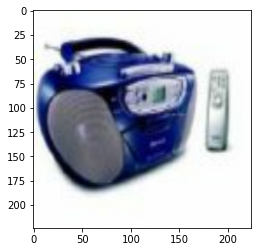

(375, 500, 3)


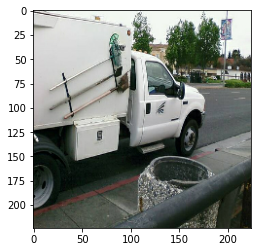

(335, 500, 3)


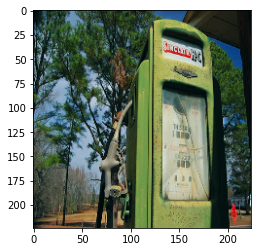

(429, 500, 3)


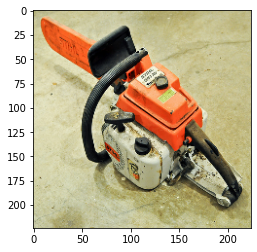

(359, 500, 3)


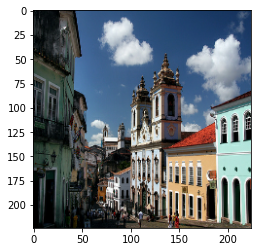

In [144]:
images = preprocess_data(ds, (224, 224))

-------


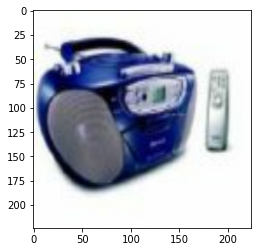

[0.5039414  0.00865774 0.         ... 0.12400401 0.02130738 0.43779743]
-------


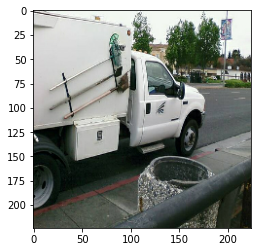

[0.         0.         0.28521797 ... 0.545134   0.74563146 0.        ]
-------


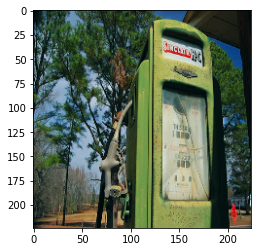

[3.7751344e-04 0.0000000e+00 3.5380822e-02 ... 0.0000000e+00 0.0000000e+00
 4.8309863e-01]
-------


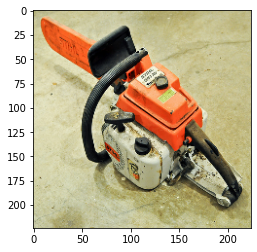

[0.2826893  0.07985481 0.6933814  ... 0.00266028 0.         0.22333355]
-------


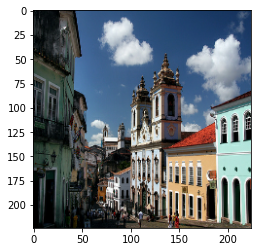

[0.43820155 0.06259407 0.         ... 0.03128747 0.0136119  0.09481067]
-------
[0.         0.33811364 0.35036814 ... 0.01707551 0.09115858 0.03898286]
-------
[0.0404915  0.         0.10267372 ... 0.5810386  0.5217768  0.86740714]
-------
[0.1908691 0.        1.120143  ... 0.3699823 0.        0.3718141]
-------
[1.17935    0.         0.34360176 ... 0.         0.25678572 0.        ]
-------
[0.46293807 0.16460952 0.         ... 0.         0.         0.13355629]
-------
[2.6745598 0.        0.        ... 1.485357  0.        0.       ]
-------
[1.8769626e-01 0.0000000e+00 3.7366083e-01 ... 3.5352088e-04 7.5930640e-02
 3.8626650e-01]
-------
[0.         0.6103882  0.21782267 ... 0.21400078 0.         0.9022687 ]
-------
[0.05162966 0.03161408 0.         ... 0.65727764 0.84893817 1.3711442 ]
-------
[1.0494767e+00 0.0000000e+00 0.0000000e+00 ... 6.5335341e-02 0.0000000e+00
 7.3589029e-04]
-------
[0.04605075 1.5025915  0.         ... 0.02612232 0.10203759 0.        ]
-------
[0.02300494 0.

In [145]:
predictions = []
for i in range(len(ds)):
  IMAGE_INDEX = i

  print('-------')

  if i < 5:
    plt.imshow(images[IMAGE_INDEX])
    plt.show()

  prediction, = m.predict(tf.expand_dims(images[IMAGE_INDEX], axis=0))
  predictions.append(prediction)
  print(prediction)

In [146]:
from sklearn.decomposition import PCA

In [147]:
pca = PCA(n_components=2)
predictions_2d = pca.fit_transform(predictions)

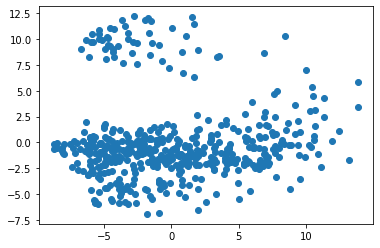

In [148]:
plt.scatter(predictions_2d[:,0], predictions_2d[:,1])

In [149]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import numpy as np

In [150]:
from matplotlib.pyplot import figure
# plt.rcParams['figure.figsize'] = [5,5]

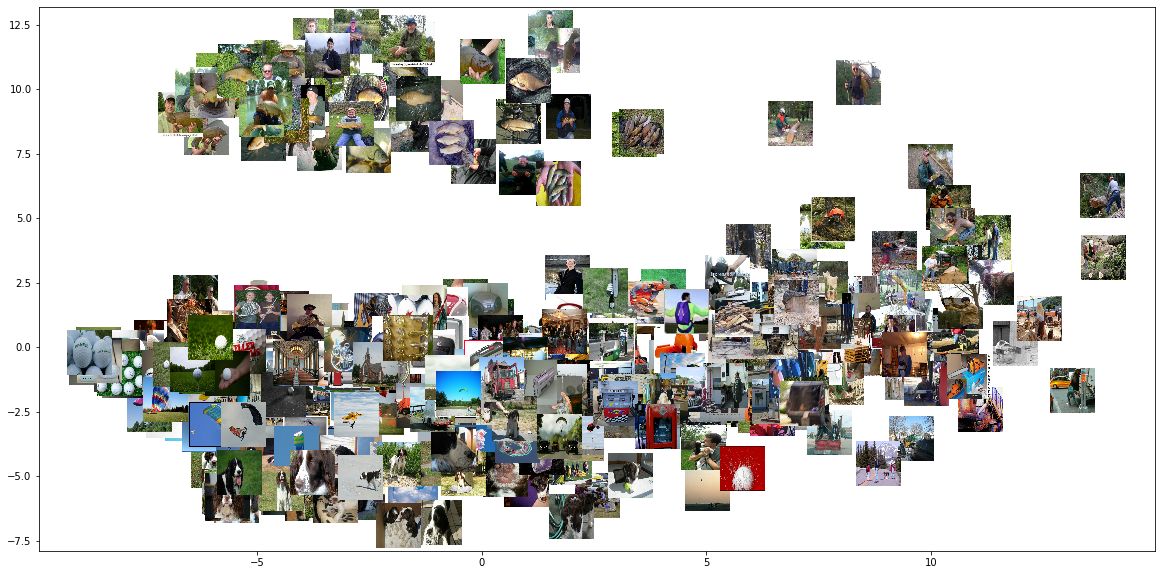

In [151]:
def imscatter(x, y, images, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    artists = []
    for x0, y0, img in zip(x, y, images):

        im = OffsetImage(img, zoom=zoom)
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))

    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists




x,y = predictions_2d[:,0], predictions_2d[:,1]

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

imscatter(x, y, images, zoom=0.2, ax=ax)

plt.show()

# Nearest Neighbours

In [152]:
from sklearn.neighbors import NearestNeighbors

In [153]:
nbrs = NearestNeighbors(n_neighbors=10).fit(predictions)

In [154]:
nbrs.n_features_in_

1280

In [198]:
input_image_index = 79

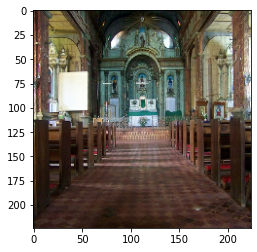

In [199]:
plt.imshow(images[input_image_index].numpy())

In [200]:
input_image_vector = predictions[input_image_index]
input_image_vector

array([1.9656956 , 0.        , 0.        , ..., 0.5855017 , 0.        ,
       0.63862157], dtype=float32)

In [201]:
distances, indices = nbrs.kneighbors([input_image_vector])

church
distance 0.0  classification model prediction:  church


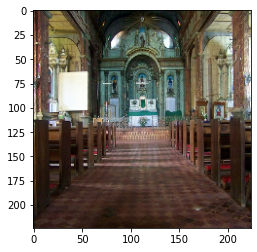

church
distance 16.39135  classification model prediction:  church


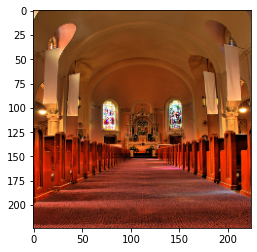

church
distance 17.477491  classification model prediction:  church


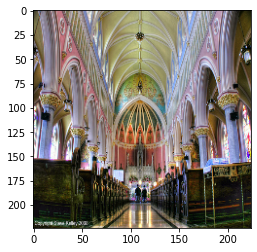

altar
distance 17.789417  classification model prediction:  altar


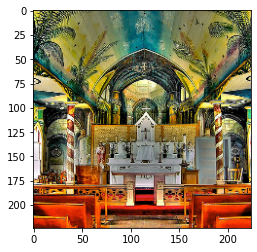

church
distance 18.170631  classification model prediction:  church


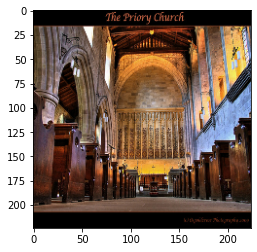

church
distance 18.257927  classification model prediction:  church


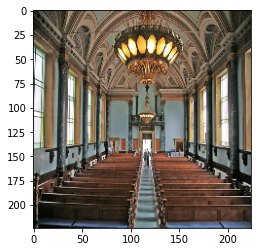

church
distance 18.859194  classification model prediction:  church


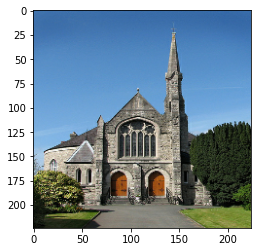

organ
distance 18.951305  classification model prediction:  organ


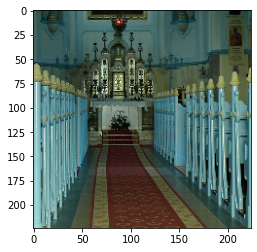

church
distance 19.436998  classification model prediction:  church


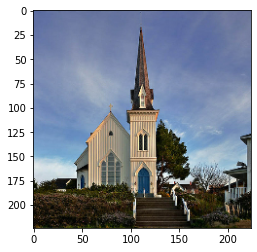

church
distance 19.454927  classification model prediction:  church


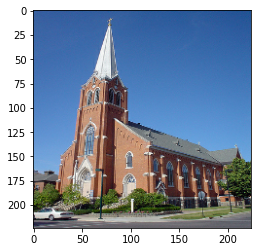

In [202]:
for dist, idx in zip(distances[0], indices[0]):

  # what would the classificiation model say
  prediction = classification_model.predict(tf.expand_dims(images[idx], axis=0))
  print(label_names[prediction.argmax()])

  print('distance', dist, ' classification model prediction: ', label_names[prediction.argmax()])
  plt.imshow(images[idx].numpy())
  plt.show()


In [203]:
indices

array([[ 79,  22, 243, 102, 434, 496, 338,  63, 166, 275]])